# Advanced symbol plotting on geographical map

Symbol plotting in Magics is the plotting of different types of symbols at selected locations. A symbol in this context is a number (the value at the location), a text string (given by the user) or a Magics marker.  

The Magics marker set contains classic markers such as dot, cross, square but also weather or clouds symbols.

List of all **msymbol** parameters you can find [in Magics documentation](https://confluence.ecmwf.int/display/MAGP/Symbol "Symbol parameters").
More symbol plotting examples can be found in [Simple symbol plotting](../tutorials/Symbol_simple.ipynb "Symbol simple") and [Advanced symbol plotting](../tutorials/Advanced_simple.ipynb "Symbol advanced") notebook.

### Installing Magics
If you don't have Magics installed, run the next cell to install Magics using conda.

In [ ]:
# Install Magics in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} Magics

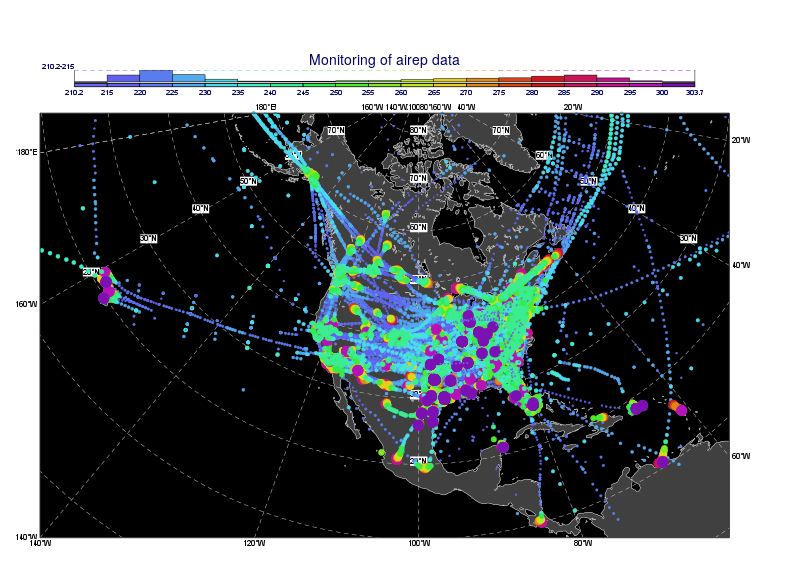

In [1]:
import Magics.macro as magics

#Setting the geographical area
north_america = magics.mmap(
    subpage_upper_right_longitude  = -15.00,
    subpage_upper_right_latitude   = 30.00,
    subpage_lower_left_latitude    = -5.00,
    subpage_map_vertical_longitude = -100.00,
    subpage_lower_left_longitude   = -140.00,
    subpage_map_projection         = "polar_stereographic",
    page_id_line                   = "off")

#Setting the coastline
coast = magics.mcoast(    
    map_coastline_colour            = "RGB(0.8,0.8,0.8,0.5)",
    map_coastline_resolution        = "medium",
    map_coastline_thickness         = 1,
    map_coastline_land_shade        = "on",
    map_coastline_land_shade_colour = "RGB(0.25,0.25,0.25)",
    map_coastline_sea_shade         = "on",
    map_coastline_sea_shade_colour  = "black",
    map_grid_line_style             = "dash",
    map_label_height                = 0.35,
    map_grid_colour                 = "RGB(0.8,0.8,0.8,0.5)")

#Loading geopoints file
airep = magics.mgeo(geo_input_file_name = "../../data/airep.geo")    # Observed temperature from aircrafts

#Setting the title
title = magics.mtext( 
    text_lines          = ["Ploting green triangle symbols"],
    text_justification  = 'center',
    text_font_size      = 0.7,
    text_mode           = "automatic",
    text_colour         = "evergreen") 

#Defining the symbols
airep_symbol = magics.msymb( 
    legend                                 = "on",
    symbol_type                            = "marker",
    symbol_table_mode                      = "advanced",
    symbol_advanced_table_selection_type   = "interval",
    symbol_advanced_table_interval         = 5.,
    symbol_advanced_table_min_level_colour = "lavender",
    symbol_advanced_table_max_level_colour = "violet",
    symbol_advanced_table_colour_direction = "clockwise",
    symbol_advanced_table_height_method    = "calculate",
    symbol_advanced_table_height_min_value = 0.1,
    symbol_advanced_table_height_max_value = 0.8,    
    symbol_marker_index                    =  15 )

#Legend
legend = magics.mlegend(
    legend_display_type = "histogram",
    legend_text_colour  = "navy")

lines =["Monitoring of airep data"]

title = magics.mtext(text_lines = lines,
           text_colour          = "navy",
           text_font_size       = 0.6,
           text_mode            = "automatic",
           text_border          = "off",
           text_justification   = "center")

# Plotting
magics.plot(north_america, coast, airep, airep_symbol, legend, title)